In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
plt.style.use('belle2')
import numpy as np
import pdg
import root_pandas
import uproot

treefile=['exp7_14_e_D_tau_nu.root']
treefile+=['exp7_14_e_other_signal.root']
treefile+=['exp7_14_e_bbkg.root']
df = root_pandas.read_root(treefile, key='B0')
#df2 = uproot.open(treefile)["B0"].arrays(library="pd")
df=df.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df['B0_isSignal'] = df['B0_isSignal'].fillna(-1)
df['D_isSignal'] = df['D_isSignal'].fillna(-1)
df['e_isSignal'] = df['e_isSignal'].fillna(-1)
df['B0_mcPDG'] = df['B0_mcPDG'].fillna(0)

df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df.eval('DOCAsig = B0_Distance / B0_DistanceError', inplace=True)
df.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)
df.eval('B0_TagVReChi2= B0_TagVChi2 / B0_TagVNDF', inplace=True)
df.eval('B0_TagVReChi2IP= B0_TagVChi2IP / B0_TagVNDF', inplace=True)

Welcome to JupyROOT 6.24/00


In [2]:
df3=df.query('__candidate__>1')[['__experiment__','__run__','__event__','__candidate__','__ncandidates__','B_D_ReChi2','B0_mcPDG','DecayMode']][1:20]
df2=df.query('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and \
                B0_roeCharge_my_mask==0 and B0_nROE_e==0 and B0_nROE_mu==0 and \
                B0_R2<0.3 and 0<B0_TagVReChi2<100 and 0<B0_TagVReChi2IP<100').copy()
df2.groupby(['__experiment__','__run__','__event__','__production__']).size().mean()
df2.groupby(['__experiment__','__run__','__event__','__production__']).ngroups

2069

### Final Cuts and Best Candidate Selection

In [2]:
#df_cut=df.query('B0_nROE_e==0 and B0_nROE_mu==0 and B0_roeMbc_my_mask>4 and B0_roeCharge_my_mask==0').copy()
B0_cuts = '4.9<B0_Mbc<5.3 and -2.5<B0_deltaE<0 and 0<=B0_vtxReChi2<6 and B0_CMS_E<5.3'
D_cuts = 'and D_vtxReChi2<6.5'
l_cuts = 'and e_CMS_p>0.2 and '
roe_cuts = 'B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and \
                B0_roeCharge_my_mask==0 and B0_nROE_e==0 and B0_nROE_mu==0 and \
                B0_R2<0.3 and 0<B0_TagVReChi2<100 and 0<B0_TagVReChi2IP<100'
#and B0_roeCharge_my_mask==0'
all_cuts = B0_cuts + D_cuts + l_cuts + roe_cuts
df_cut=df.query('4.9<B0_Mbc<5.3 and B0_roeCharge_my_mask==0 and B0_nROE_e==0 and B0_nROE_mu==0 and \
                B0_R2<0.3 and 0<B0_TagVReChi2<100 and 0<B0_TagVReChi2IP<100').copy()
df_bestSelected=df_cut.loc[df_cut.groupby(['__experiment__','__run__','__event__','__production__']).B_D_ReChi2.idxmin()]
#df_bestSelected['__ncandidates__']=df_bestSelected.groupby('__event__').transform(len)

In [3]:
# B decay
B_meson='B0_mcPDG==511 or B0_mcPDG==-511 or B0_mcPDG==521 or B0_mcPDG==-521'
tau_modes = 'DecayMode=="D_tau_nu" or DecayMode=="Dst_tau_nu" or DecayMode=="Dstst_tau_nu"'
e_modes = 'DecayMode=="D_e_nu" or DecayMode=="Dst_e_nu" or DecayMode=="Dstst_e_nu"'
mu_modes = 'DecayMode=="D_mu_nu" or DecayMode=="Dst_mu_nu" or DecayMode=="Dstst_mu_nu"'
bkg_misIdAndTwoD = 'DecayMode=="bkg"'
# Not B decay
bkg_combinatorial_oneBsignal = 'B0_mcPDG==300553 and DecayMode!="bkg"'
bkg_combinatorial_noBsignal = 'B0_mcPDG==300553 and DecayMode=="bkg"'
bkg_BDaughterDecay = 'B0_mcPDG!=511 and B0_mcPDG!=-511 and B0_mcPDG!=521 and B0_mcPDG!=-521 \
and B0_mcPDG!=300553 and B0_mcPDG!=0 and B0_isContinuumEvent!=1'
bkg_misId2='B0_mcPDG==0'
bkg_continuum = 'B0_isContinuumEvent==1'

df_B_mother = df_bestSelected.query(B_meson)
df_tau = df_B_mother.query(tau_modes)
df_e = df_B_mother.query(e_modes)
df_mu = df_B_mother.query(mu_modes)
df_bkg_misIdAndTwoD = df_B_mother.query(bkg_misIdAndTwoD)
# Not B decay
df_bkg_comb_oneBsignal = df_bestSelected.query(bkg_combinatorial_oneBsignal)
df_bkg_comb_noBsignal = df_bestSelected.query(bkg_combinatorial_noBsignal)
df_bkg_BDaughterDecay = df_bestSelected.query(bkg_BDaughterDecay)
df_bkg_misId2 = df_bestSelected.query(bkg_misId2)
df_bkg_continuum = df_bestSelected.query(bkg_continuum)

D_e_nu=df_e.query('DecayMode=="D_e_nu"')
D_mu_nu=df_mu.query('DecayMode=="D_mu_nu"')
D_tau_nu=df_tau.query('DecayMode=="D_tau_nu"')
Dst_e_nu=df_e.query('DecayMode=="Dst_e_nu"')
Dst_mu_nu=df_mu.query('DecayMode=="Dst_mu_nu"')
Dst_tau_nu=df_tau.query('DecayMode=="Dst_tau_nu"')
Dstst_e_nu=df_e.query('DecayMode=="Dstst_e_nu"')
Dstst_mu_nu=df_mu.query('DecayMode=="Dstst_mu_nu"')
Dstst_tau_nu=df_tau.query('DecayMode=="Dstst_tau_nu"')

In [4]:
def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = %d \nmean = %5.3f \nstd = %5.3f''' %(counts,mean,std)

kwarg={'bins':25, 'histtype':'step','lw':2}

def plot_components(variable):
    D_tau_nu[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu[variable])}')
    D_e_nu[variable].hist(label=f'e \n{statistics(D_e_nu[variable])}',**kwarg)
    df_mu[variable].hist(label=f'mu \n{statistics(df_mu[variable])}',**kwarg)
    df_bkg_misIdAndTwoD[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD[variable])}',**kwarg)
    df_bkg_comb_oneBsignal[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal[variable])}',**kwarg)
    df_bkg_comb_noBsignal[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal[variable])}',**kwarg)
    df_bkg_BDaughterDecay[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay[variable])}',**kwarg)
    df_bkg_misId2[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2[variable])}',**kwarg)
    df_bkg_continuum[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_components_withcut(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'e \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    df_mu.query(cut)[variable].hist(label=f'mu \n{statistics(df_mu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_signal(variable):
    D_tau_nu[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu[variable])}')
    Dst_tau_nu[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu[variable])}',**kwarg)
    Dstst_tau_nu[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu[variable])}',**kwarg)
    D_e_nu[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu[variable])}',**kwarg)
    Dst_e_nu[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu[variable])}',**kwarg)
    Dstst_e_nu[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_projection(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    Dst_tau_nu.query(cut)[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu.query(cut)[variable])}',**kwarg)
    Dst_e_nu.query(cut)[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu.query(cut)[variable])}',**kwarg)
    Dstst_tau_nu.query(cut)[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu.query(cut)[variable])}',**kwarg)
    Dstst_e_nu.query(cut)[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)

In [5]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

In [8]:
df.groupby(['__experiment__','__run__','__event__','__production__']).ngroups

687857

In [9]:
len(df)

778443

In [10]:
df_bestSelected.groupby(['__experiment__','__run__','__event__','__production__']).ngroups

86009

Text(0.5, 1.0, '$M_{miss}^2$ after cuts')

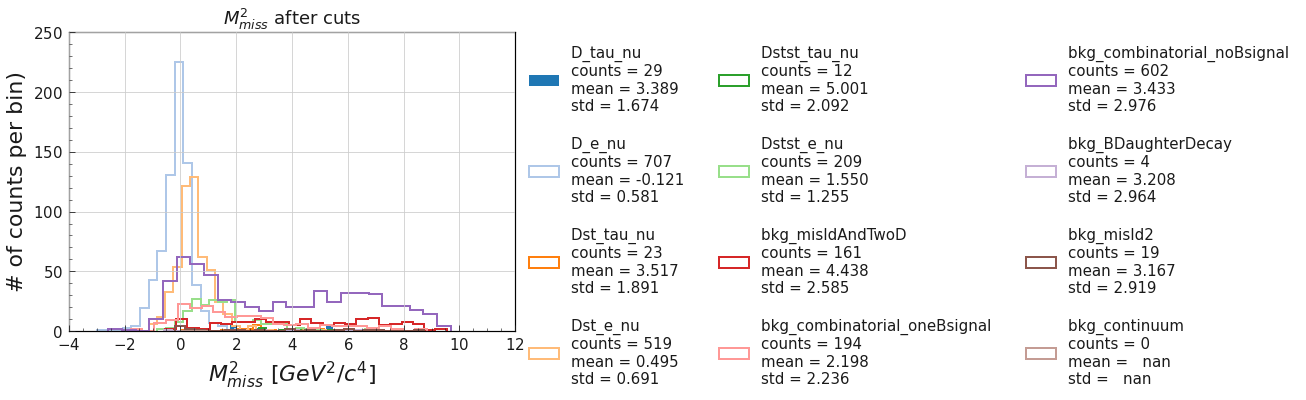

In [6]:
plot_projection('0<=B0_vtxReChi2<6 and B0_CMS_E<5.3 and D_vtxReChi2<6.5 and e_CMS_p>0.2 and \
B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts per bin)')
plt.title('$M_{miss}^2$ after cuts')

(1.855, 1.885)

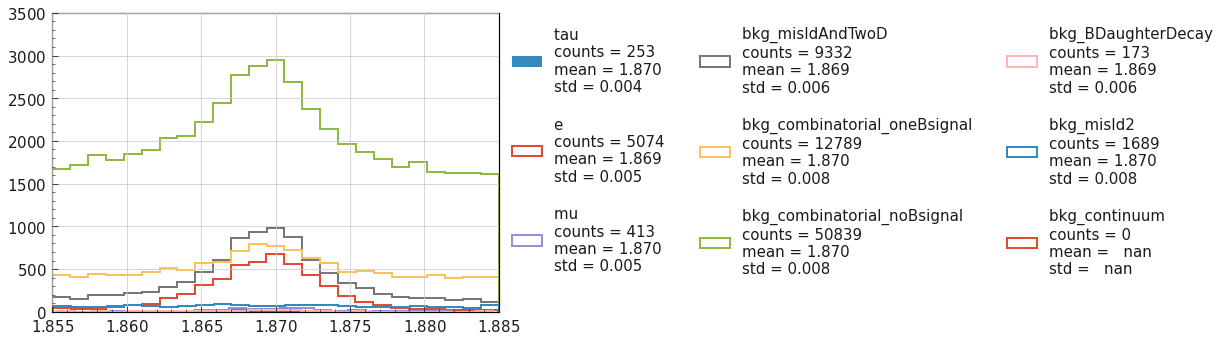

In [27]:
plot_components('D_BFM')
plt.xlim(1.855,1.885)

Text(0.5, 1.0, 'missingMomentumOfEvent_theta')

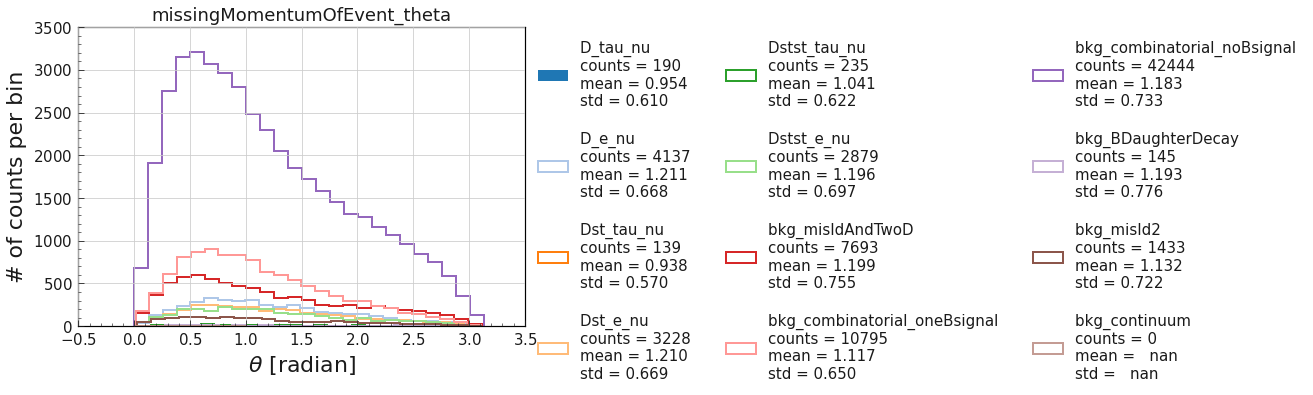

In [8]:
plot_projection('B0_roeMbc_my_mask>0', 'B0_missingMomentumOfEvent_theta')
plt.xlabel("$\\theta$ [radian]")
plt.ylabel('# of counts per bin')
plt.title('missingMomentumOfEvent_theta')

(4.0, 5.4)

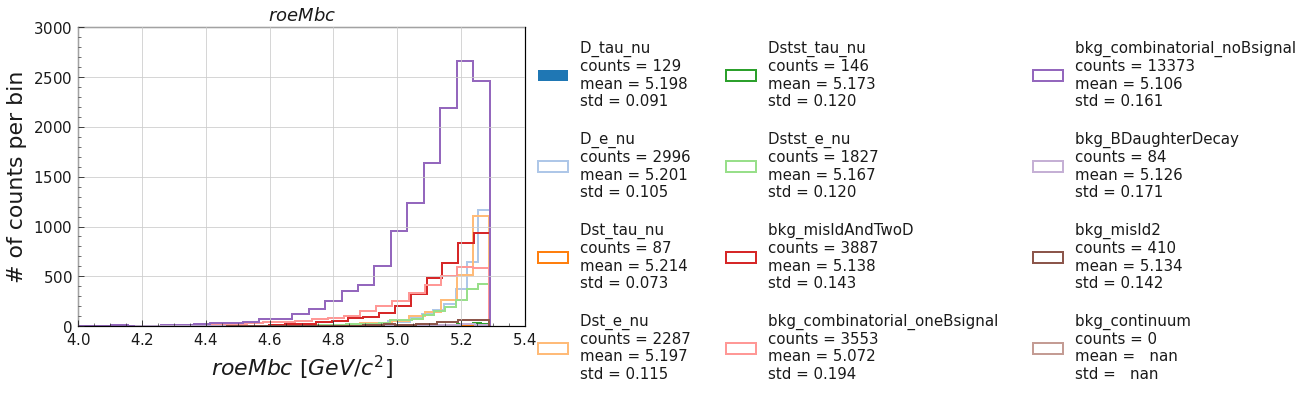

In [9]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and B0_vtxReChi2<8 and D_vtxReChi2<3.5 and \
1<B0_vtxDDSig and 1<DOCAsig and B0_roeMbc_my_mask>4', 'B0_roeMbc_my_mask')
plt.xlabel("$roeMbc\ [GeV/c^2]$")
plt.ylabel('# of counts per bin')
plt.title('$roeMbc$')
plt.xlim(4,5.4)
#plt.ylim(0,8)

(4.0, 5.4)

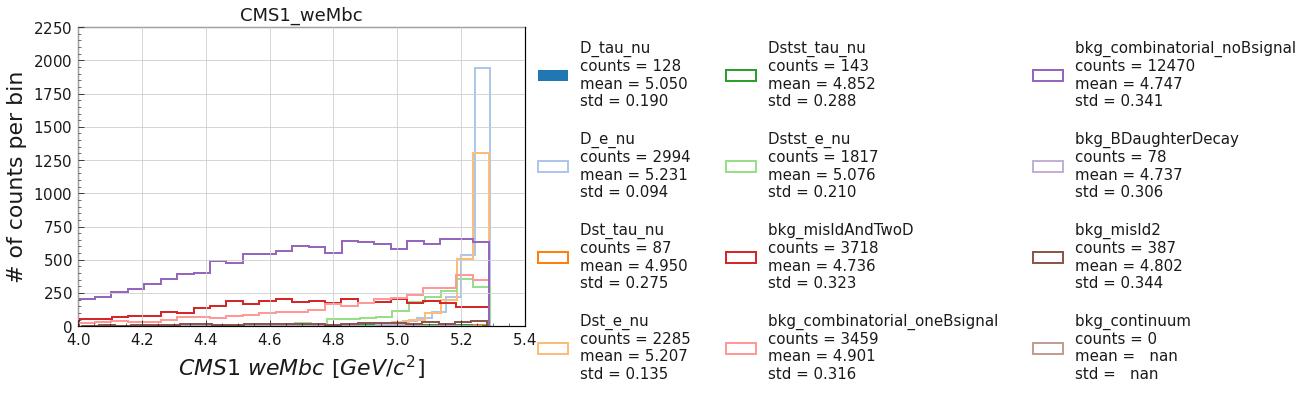

In [10]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and B0_vtxReChi2<8 and D_vtxReChi2<3.5 and \
1<B0_vtxDDSig and 1<DOCAsig and B0_CMS1_weMbc>4', 'B0_CMS1_weMbc')
plt.xlabel("$CMS1\ weMbc\ [GeV/c^2]$")
plt.ylabel('# of counts per bin')
plt.title('CMS1_weMbc')
plt.xlim(4,5.4)
#plt.ylim(0,8)

Text(0.5, 1.0, '$roe\\Delta E$')

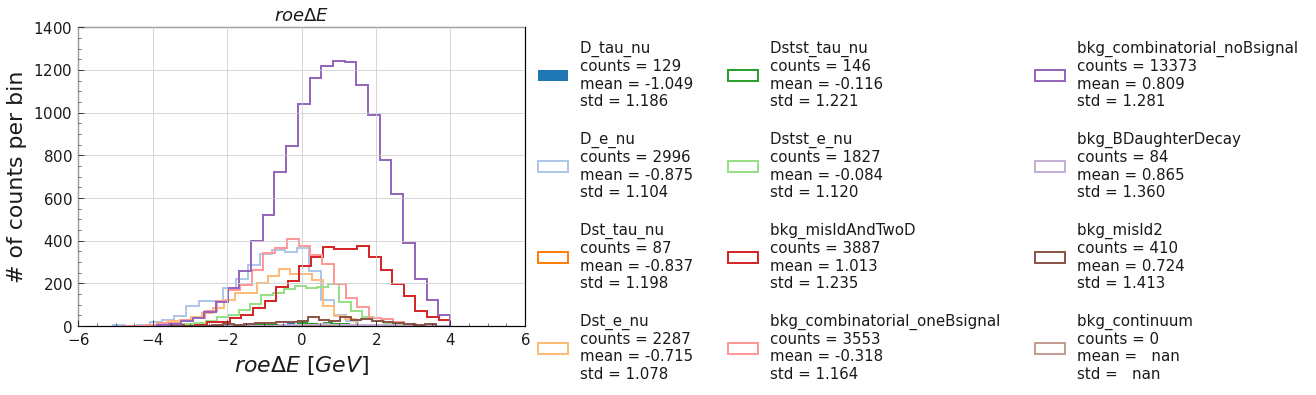

In [7]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and B0_vtxReChi2<8 and D_vtxReChi2<3.5 and \
1<B0_vtxDDSig and 1<DOCAsig', 'B0_roeDeltae_my_mask')
plt.xlabel("$roe\Delta E\ [GeV]$")
plt.ylabel('# of counts per bin')
plt.title('$roe\Delta E$')

Text(0.5, 1.0, '$CMS\\ we\\Delta E$')

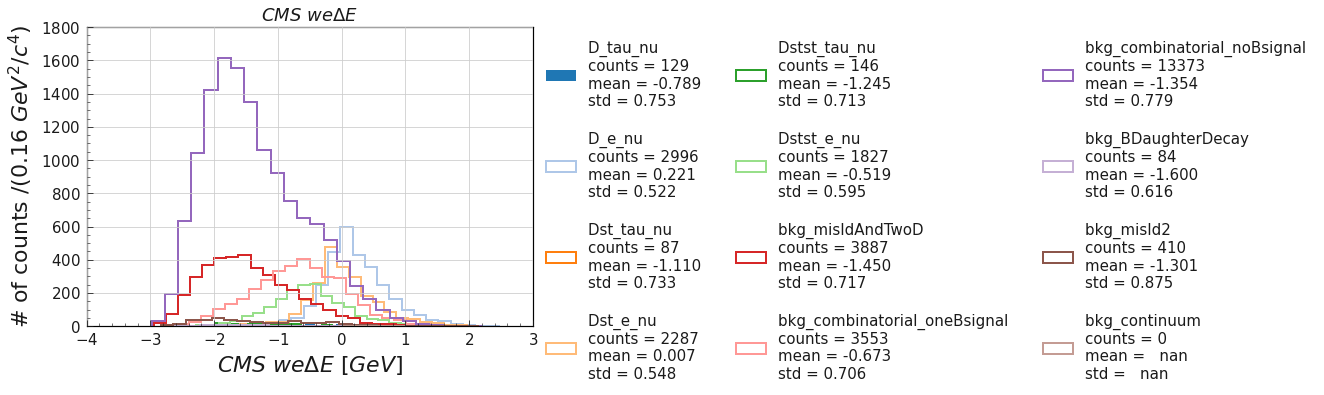

In [12]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and B0_vtxReChi2<8 and D_vtxReChi2<3.5 and \
1<B0_vtxDDSig and 1<DOCAsig', 'B0_CMS_weDeltae')
plt.xlabel("$CMS\ we\Delta E\ [GeV]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$CMS\ we\Delta E$')

In [ ]:
plot_projection('p_D_l>0 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'p_D_l')
plt.xlabel("$p_{D}+p_{l}\ [GeV/c]$")
plt.ylabel('# of counts /(0.07 $GeV/c$)')
plt.title('Reconstruct $B_{sig}(De)$ and $B_{tag}(ROE)$')
plt.xlim(0,4.8)
#plt.ylim(0,15)

Text(0.5, 1.0, '$M_{miss}^2\\ for\\ p_{D}+p_{l}>2.5GeV/c$')

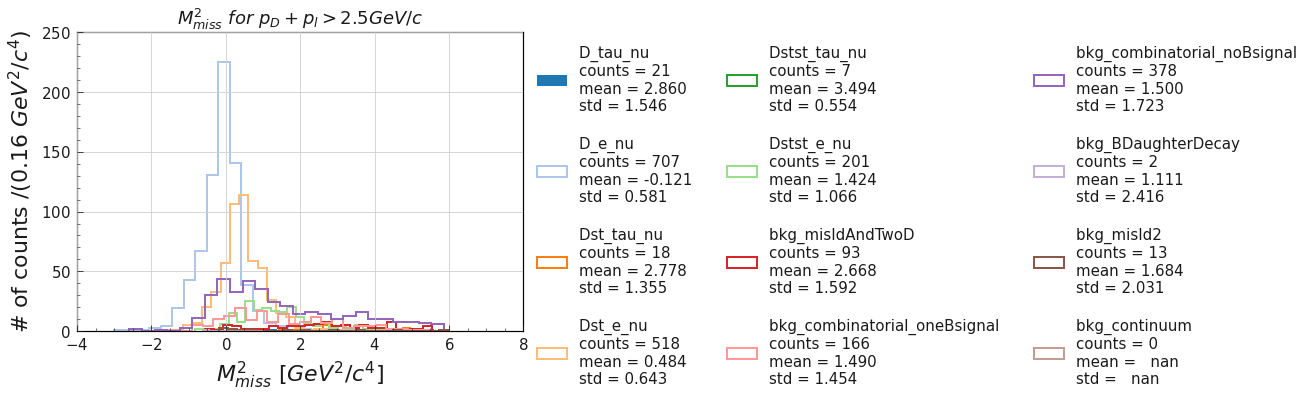

In [6]:
plot_projection('4.9<B0_Mbc<5.3 and -2.5<B0_deltaE<0 and 0<=B0_vtxReChi2<6 and B0_CMS_E<5.3 and \
D_vtxReChi2<6.5 and e_CMS_p>0.2 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$M_{miss}^2\ for\ p_{D}+p_{l}>2.5GeV/c$')

Text(0.5, 1.0, '$M_{miss}^2\\ for\\ p_{D}+p_{l}>2.5GeV/c$')

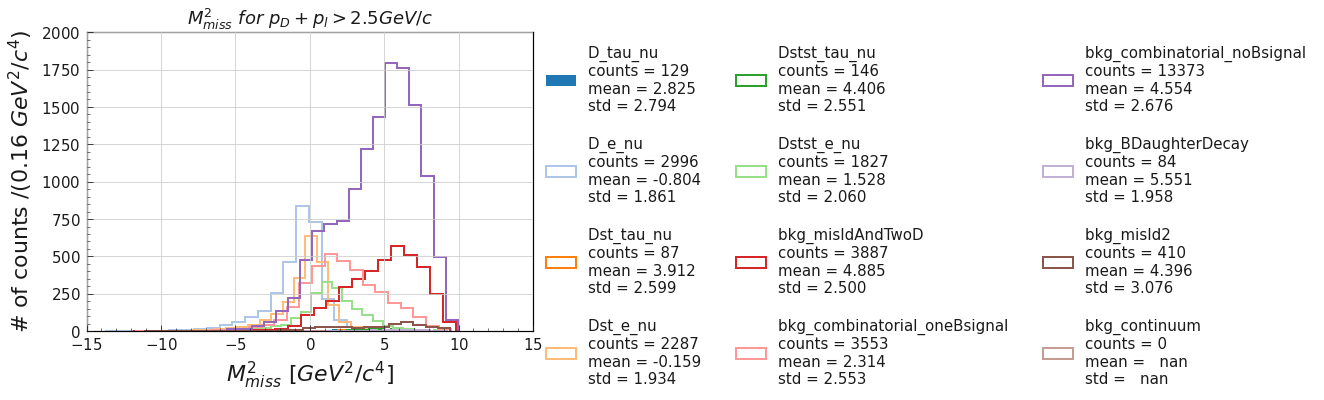

In [13]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and \
B0_vtxReChi2<8 and D_vtxReChi2<3.5 and 1<B0_vtxDDSig and 1<DOCAsig', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$M_{miss}^2\ for\ p_{D}+p_{l}>2.5GeV/c$')
#plt.xlim(-3,7)
#plt.ylim(0,8)

(-10.0, 10.0)

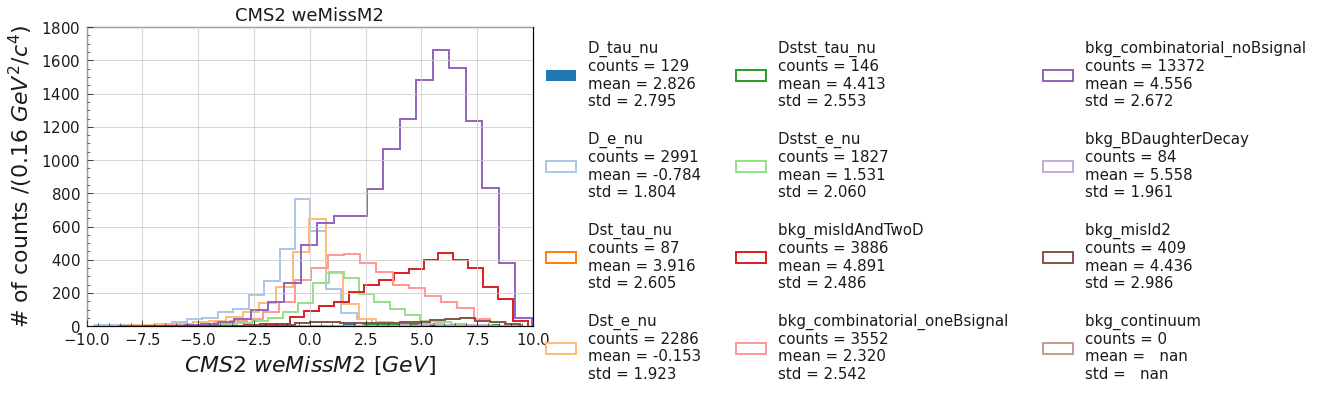

In [16]:
plot_projection('0.2967<missingMomentumOfEvent_theta<2.7925 and B0_vtxReChi2<8 and D_vtxReChi2<3.5 and \
1<B0_vtxDDSig and 1<DOCAsig and -10<B0_CMS2_weMissM2<10', 'B0_CMS2_weMissM2')
plt.xlabel("$CMS2\ weMissM2\ [GeV]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('CMS2 weMissM2')
plt.xlim(-10,10)

Text(0.5, 1.0, '$B\\ vertex\\ reduced\\ \\chi^2$')

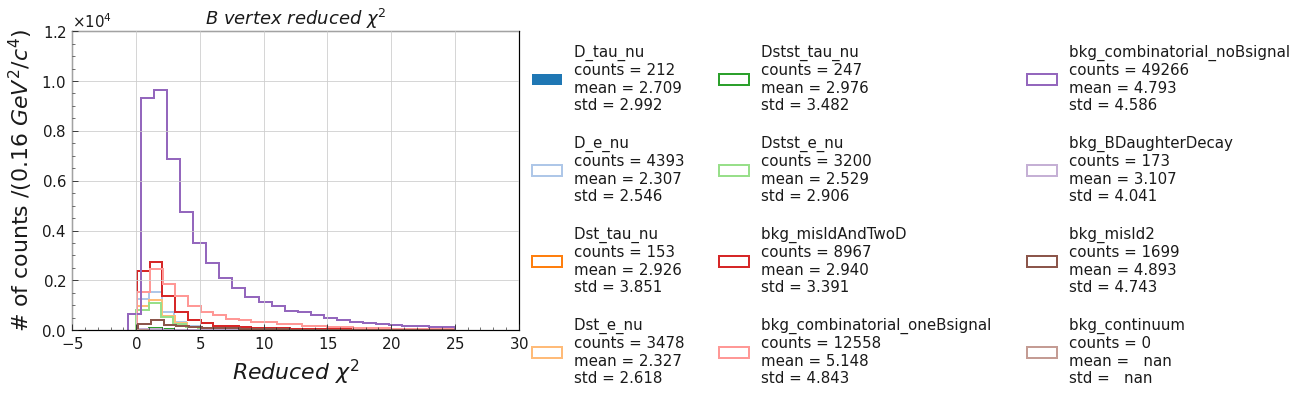

In [26]:
plot_projection('p_D_l>0', 'B0_vtxReChi2')
plt.xlabel("$Reduced\ \chi^2$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$B\ vertex\ reduced\ \chi^2$')

Text(0.5, 1.0, '$B\\ vertex\\ reduced\\ \\chi^2$')

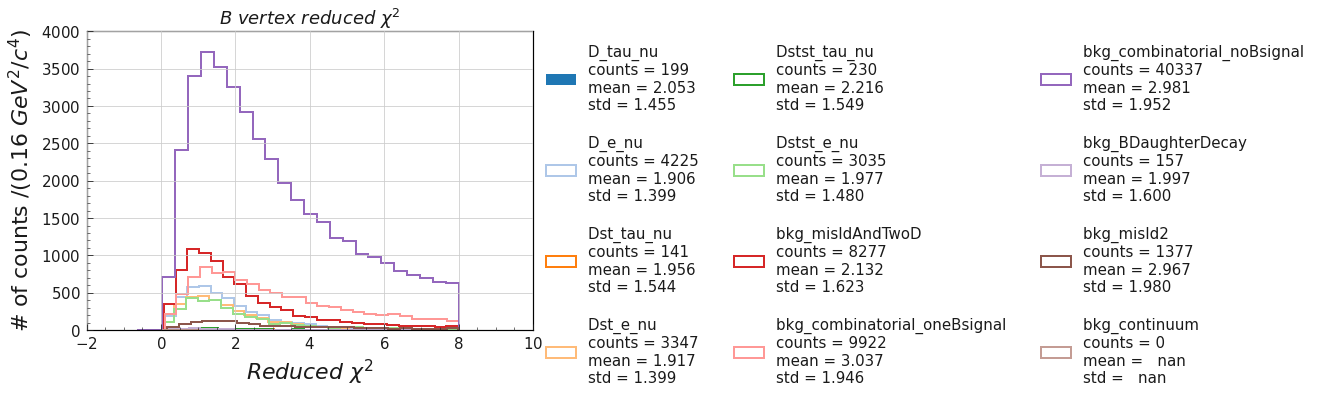

In [27]:
plot_projection('p_D_l>0 and B0_vtxReChi2<8', 'B0_vtxReChi2')
plt.xlabel("$Reduced\ \chi^2$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$B\ vertex\ reduced\ \chi^2$')

Text(0.5, 1.0, '$D\\ vertex\\ reduced\\ \\chi^2$')

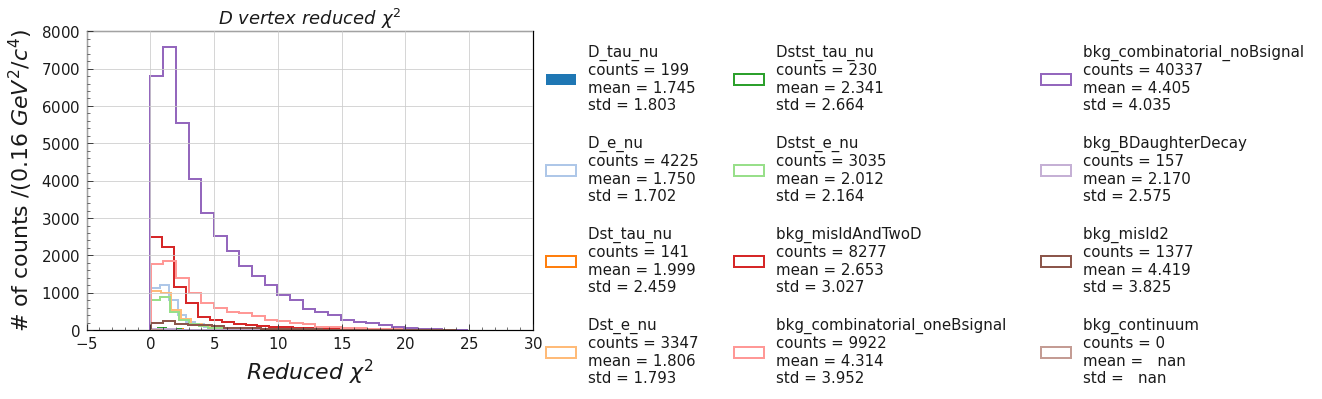

In [28]:
plot_projection('B0_vtxReChi2<8', 'D_vtxReChi2')
plt.xlabel("$Reduced\ \chi^2$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$D\ vertex\ reduced\ \chi^2$')

Text(0.5, 1.0, '$D\\ vertex\\ reduced\\ \\chi^2$')

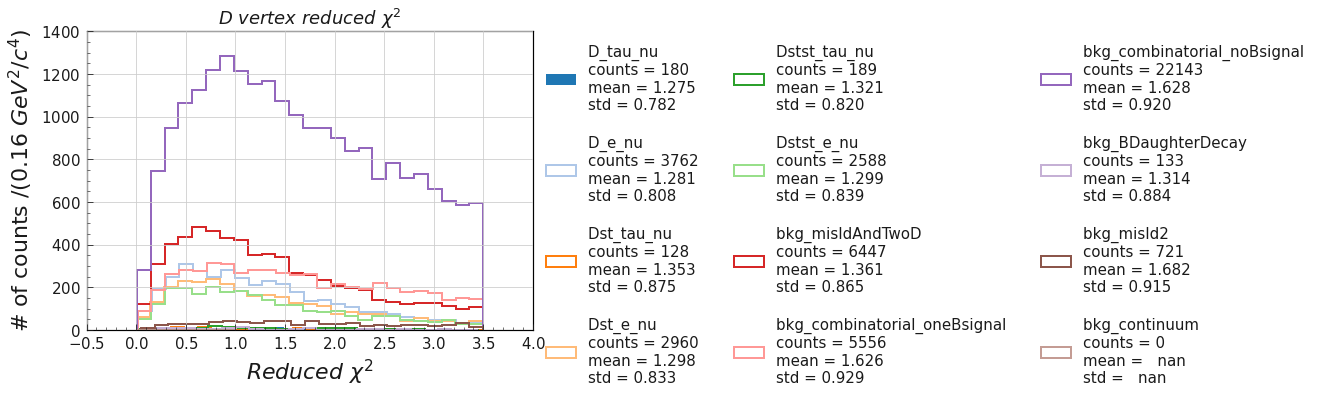

In [29]:
plot_projection('B0_vtxReChi2<8 and D_vtxReChi2<3.5', 'D_vtxReChi2')
plt.xlabel("$Reduced\ \chi^2$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$D\ vertex\ reduced\ \chi^2$')

Text(0.5, 1.0, 'B and D vertices distance')

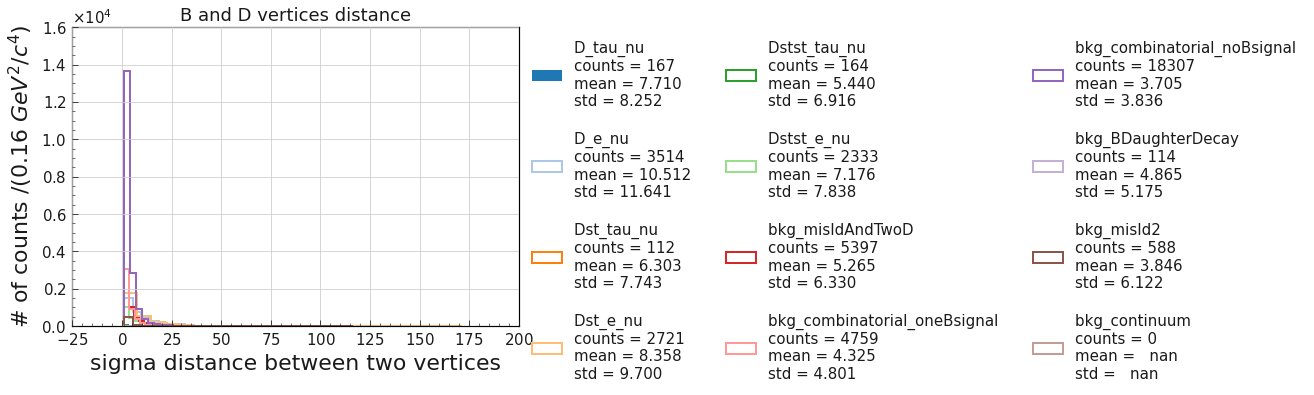

In [34]:
plot_projection('B0_vtxReChi2<8 and D_vtxReChi2<3.5 and 1<B0_vtxDDSig', 'B0_vtxDDSig')
plt.xlabel("sigma distance between two vertices")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('B and D vertices distance')

Text(0.5, 1.0, 'DOCA sig')

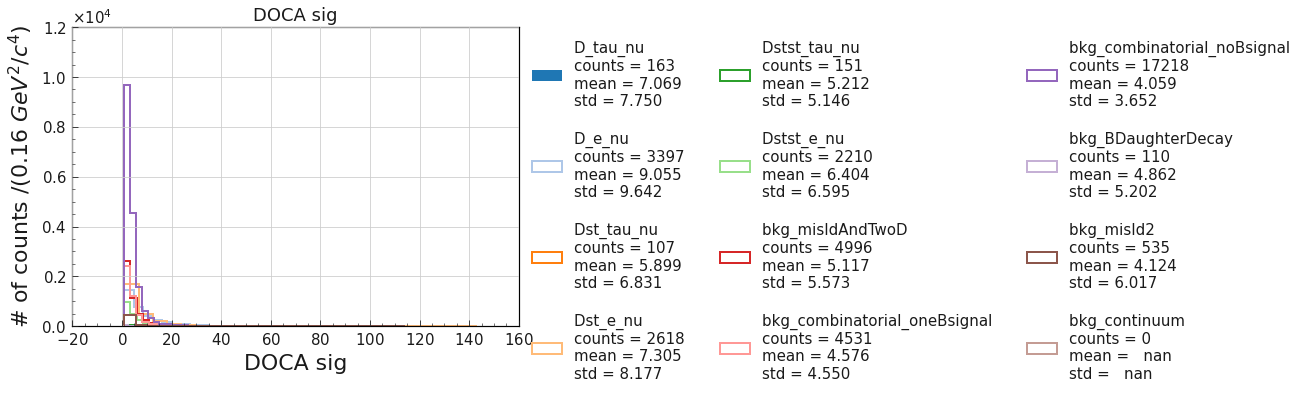

In [35]:
plot_projection('B0_vtxReChi2<8 and D_vtxReChi2<3.5 and 1<B0_vtxDDSig and 1<DOCAsig', 'DOCAsig')
plt.xlabel("DOCA sig")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('DOCA sig')

(-3.0, 7.0)

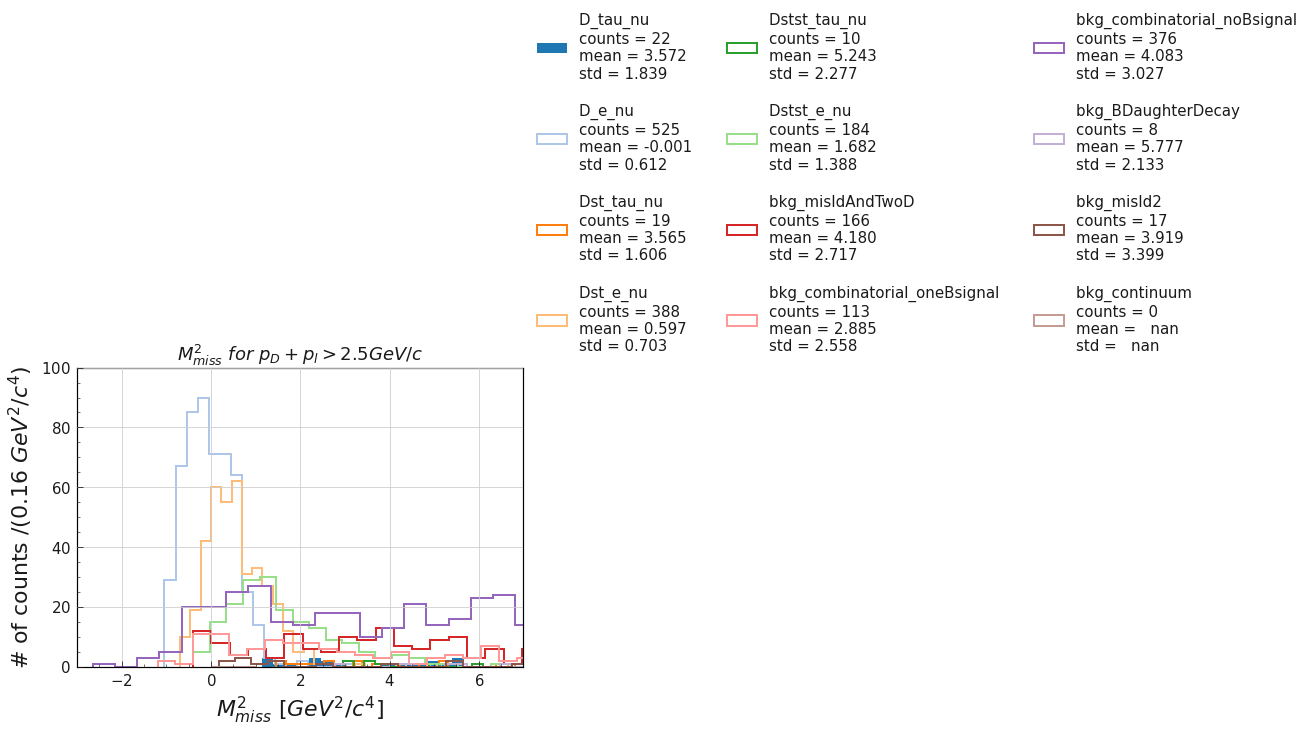

In [41]:
plot_projection('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and 0.2967<missingMomentumOfEvent_theta<2.7925 and \
B0_vtxReChi2<8 and D_vtxReChi2<3.5 and 1<B0_vtxDDSig and 1<DOCAsig', 'B0_recMissM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$M_{miss}^2\ for\ p_{D}+p_{l}>2.5GeV/c$')
plt.xlim(-3,7)
#plt.ylim(0,8)

(-3.0, 7.0)

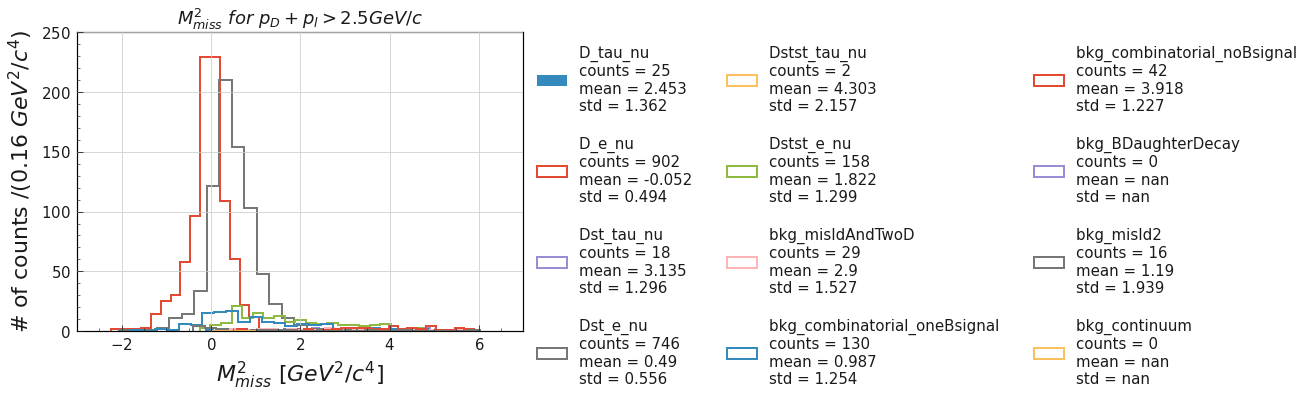

In [6]:
plot_projection('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and B0_roeCharge_my_mask==0 and B0_nROE_e==0 and B0_nROE_mu==0 and B0_R2<0.3', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.16 $GeV^2/c^4$)')
plt.title('$M_{miss}^2\ for\ p_{D}+p_{l}>2.5GeV/c$')
plt.xlim(-3,7)
#plt.ylim(0,8)

In [15]:
def plot_projection_stacked(cut,variable):
    kwarg={'bins':25, 'histtype':'barstacked','range':(-2,6.5)}
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    Dst_tau_nu.query(cut)[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu.query(cut)[variable])}',**kwarg)
    Dst_e_nu.query(cut)[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu.query(cut)[variable])}',**kwarg)
    Dstst_tau_nu.query(cut)[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu.query(cut)[variable])}',**kwarg)
    Dstst_e_nu.query(cut)[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)

(-2.0, 6.5)

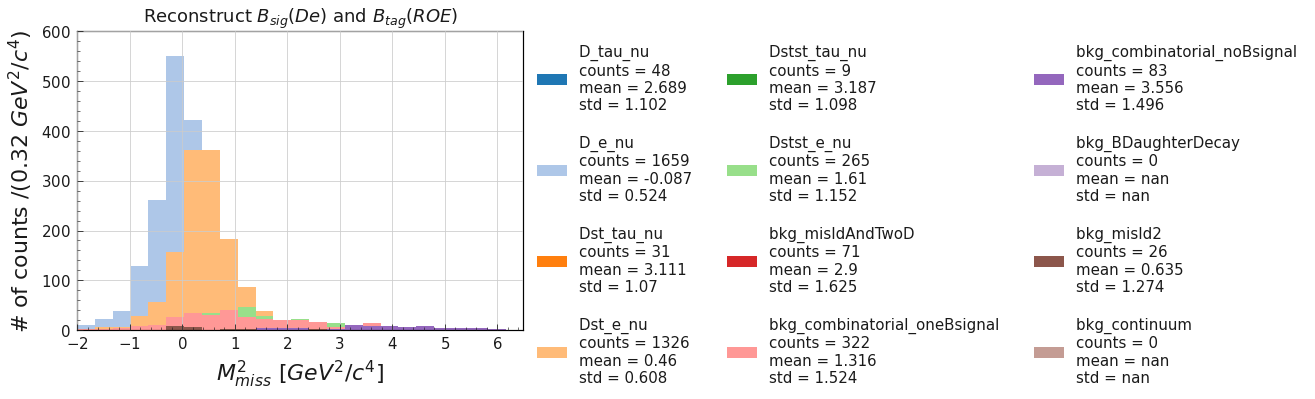

In [17]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
plot_projection_stacked('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and \
                B0_roeCharge_my_mask==0 and B0_nROE_e==0 and B0_nROE_mu==0 and B0_R2<0.3', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.32 $GeV^2/c^4$)')
plt.title('Reconstruct $B_{sig}(De)$ and $B_{tag}(ROE)$')
plt.xlim(-2,6.5)

In [ ]:
name_list = [r'$D\tau_\mu\nu$',r'$D*\tau_\mu\nu$',r'$D**\tau_\mu\nu$',
             r'$D\mu\nu$',r'$D*\mu\nu$',r'$D**\mu\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial_oneBsignal',
             'bkg_combinatorial_noBsignal','bkg_BdaughterDecay',
             'bkg_midId2','bkg_continuum']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_mu_nu,Dst_mu_nu,Dstst_mu_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb_oneBsignal,df_bkg_comb_noBsignal,
           df_bkg_BDaughterDecay,df_bkg_misId2,df_bkg_continuum]   
    
    
df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,4]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).p_D_l, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        ax[i,j].set_title(name_list[k],fontsize=12)
        k+=1
        
def commonXY(xlabel, ylabel, padding, fontSize):
    # add a big axes, hide frame
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel(xlabel,labelpad=padding, fontsize=fontSize)
    plt.ylabel(ylabel, labelpad=padding, fontsize=fontSize)

commonXY("$p_{D}+p_{l}\ [GeV/c]$","$M_{miss}^2\ [GeV^2/c^4]$",10,24)

#plt.xlabel('$p_{D}+p_{l}\ [GeV/c]$')
#plt.ylabel('$M_{miss}^2\ [GeV^2/c^4]$')

In [ ]:
plt.hist2d(df_bestSelected.p_D_l, df_bestSelected.MM2,
                range=[[0.5,5],[-4,7]],bins=25,cmap='jet',norm=colors.LogNorm())
plt.title('Reconstruct $B_{sig}(D\mu)$ and $B_{tag}(ROE)$')
plt.colorbar()
plt.xlabel('$p_{D}+p_{l}\ [GeV/c]$')
plt.ylabel('$M_{miss}^2\ [GeV^2/c^4]$')

In [ ]:
np.reshape(df.columns,(1,375))

## 1. $De$

In [ ]:
De_info= df[['B0_CMS_p','B0_CMS_E','B0_deltaE','B0_Mbc', 'B0_SigM', 'B0_InvM',
             'B0_dM', 'B0_Q','B0_dQ','B0_isSignal', 'B0_missingMass2OfEvent', 
             'B0_m2Recoil', "B0_R2","B0_thrustBm","B0_thrustOm","B0_cosTBTO","B0_cosTBz","B0_isContinuumEvent",
             'B0_vtxReChi2', 'B0_vtxDD','B0_vtxDDSig','DecayMode','MM2']]
De_info.describe()

In [ ]:
df.__event__.nunique()

In [ ]:
df_bestSelected.query('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5').groupby(['B0_mcPDG','DecayMode']).__event__.nunique().unstack()

In [ ]:
df2=df.groupby(['__ncandidates__','B0_mcPDG']).__event__.nunique().unstack(level=0,fill_value=0)
df2

In [ ]:
df2.transpose().plot.bar(rot=0,table=True)

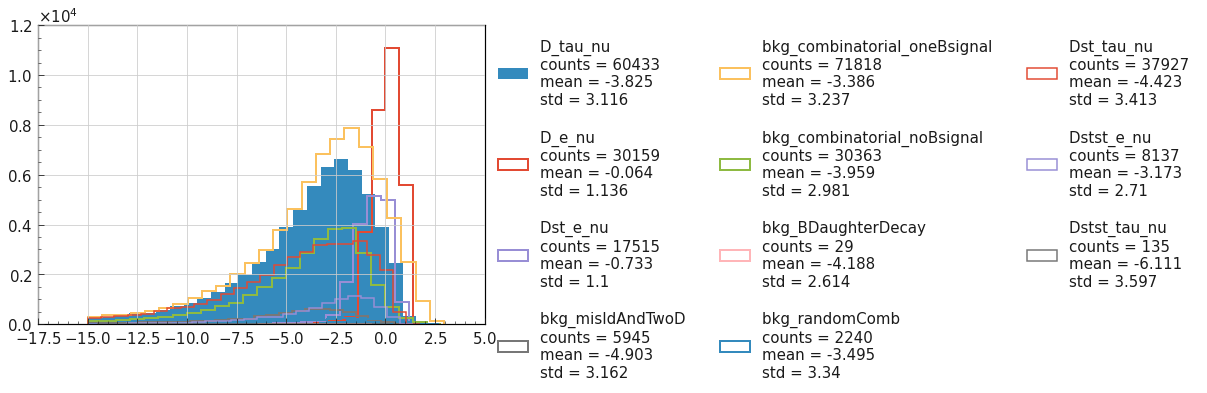

In [55]:
plot_projection('B0_cos_pB>-15','B0_cos_pB')

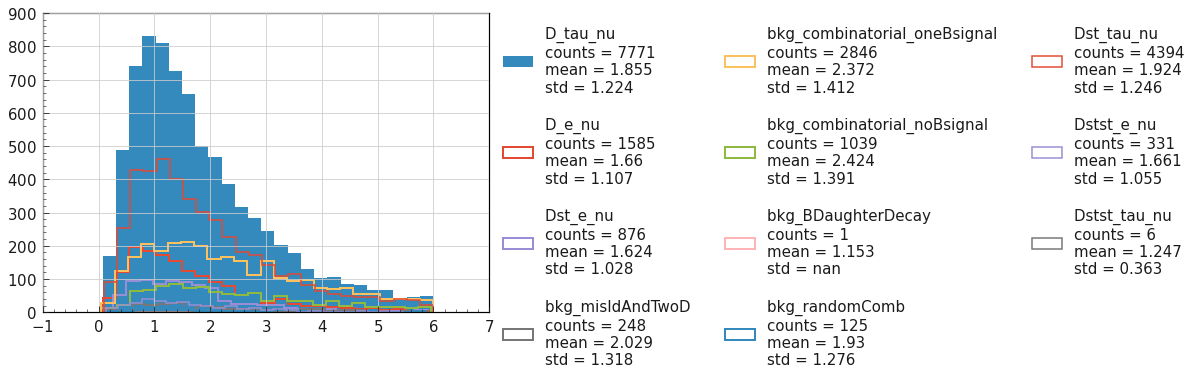

In [59]:
plot_projection('B0_roeMbc_my_mask>5.26 and B0_roeCharge_my_mask==0','B0_vtxReChi2')

## 2. Tag B

### 2.1 Tag Kimematics

In [ ]:
roe_kin= df[['B0_CMS_roeE_my_mask','B0_roeM_my_mask', 'B0_CMS_roeP_my_mask', 'B0_CMS_roePt_my_mask',
              'B0_roeMbc_my_mask','B0_roeDeltae_my_mask',
              'B0_roeCharge_my_mask','B0_roeNeextra_my_mask', 'B0_roeEextra_my_mask',
              'B0_nROE_Charged_my_mask', 'B0_nROE_ECLClusters_my_mask','B0_nROE_KLMClusters',
              'B0_nROE_Photons_my_mask','B0_nROE_Tracks_my_mask', 'B0_nROE_RemainingTracks_my_mask']]
roe_kin.describe()

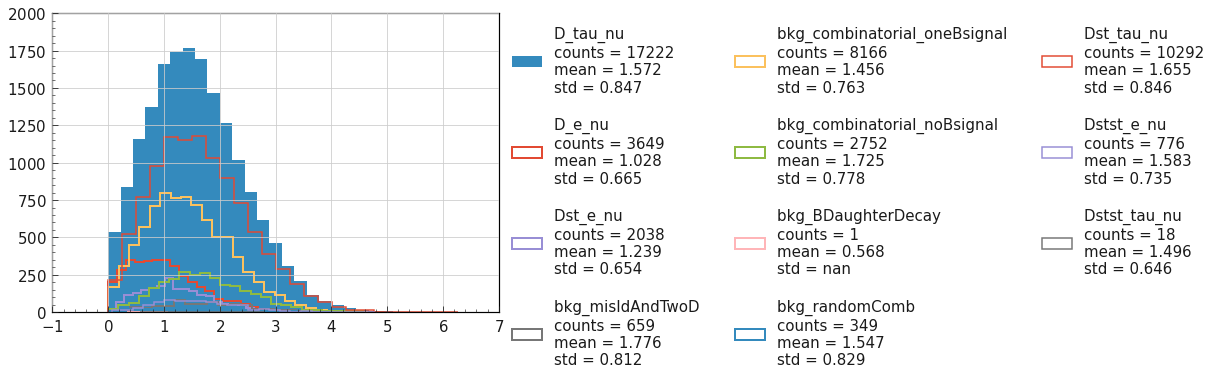

In [42]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_roeNeextra_my_mask')

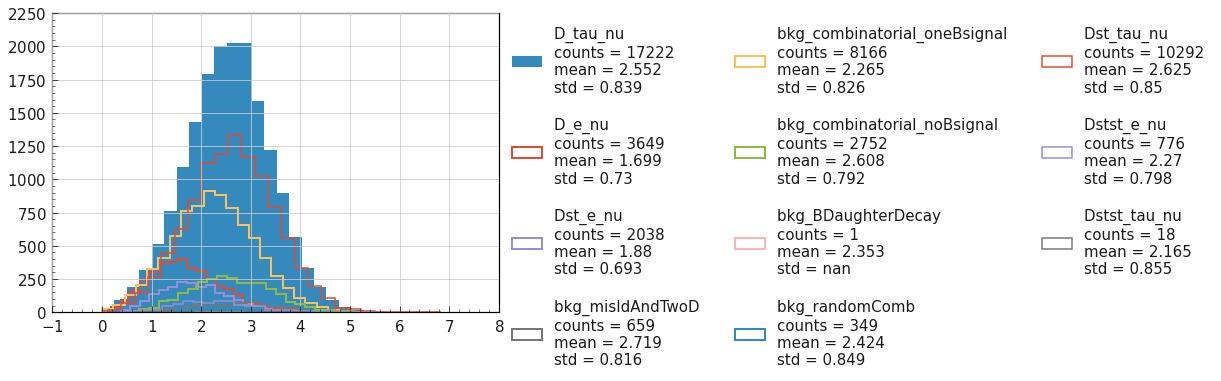

In [43]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_roeEextra_my_mask')

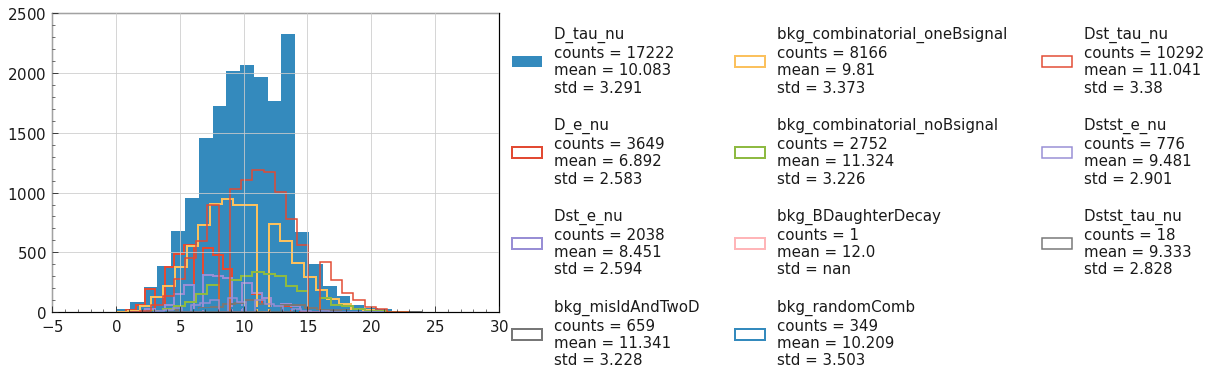

In [46]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_nROE_ECLClusters_my_mask')

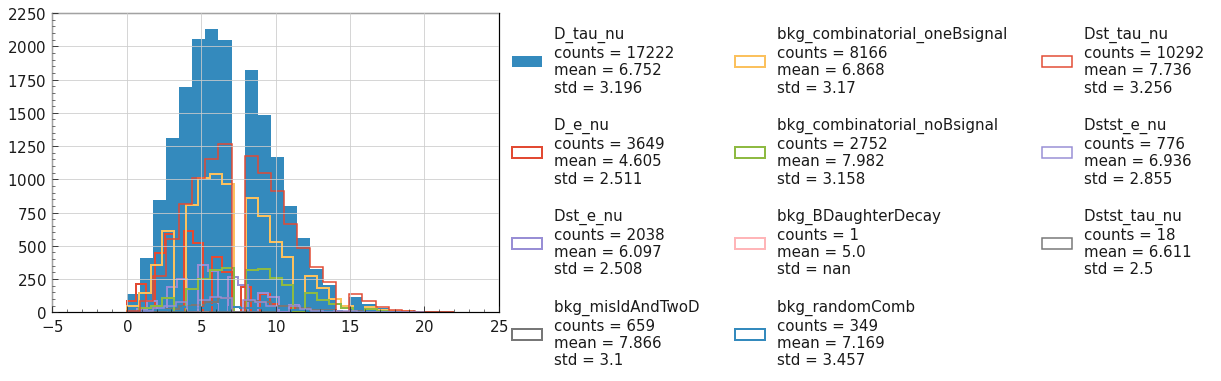

In [47]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_nROE_Photons_my_mask')

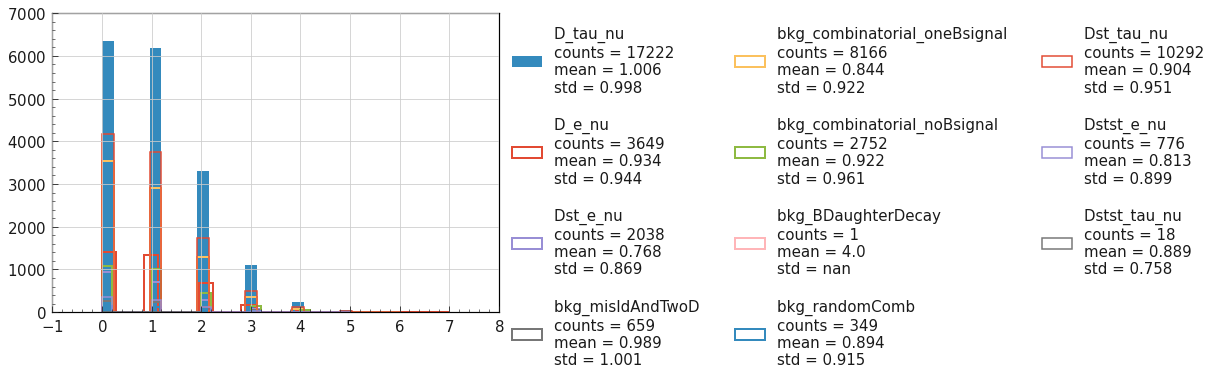

In [50]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_nROE_KLMClusters')

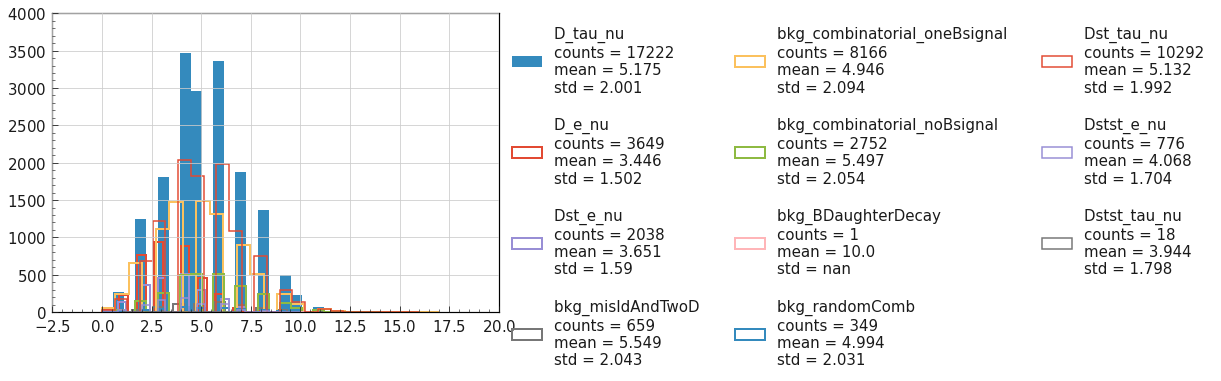

In [72]:
plot_projection('B0_roeMbc_my_mask>5.26','B0_nROE_Tracks_my_mask')

### 2.2 Tag Vertex

In [ ]:
roe_vertex = df[['B0_TagVLBoost', 'B0_TagVLBoostErr', 'B0_TagVOBoost',
                 'B0_TagVOBoostErr', 'B0_TagVpVal', 'B0_TagVNDF', 'B0_TagVChi2',
                 'B0_TagVChi2IP', 'B0_TagVx', 'B0_TagVxErr', 'B0_TagVy',
                 'B0_TagVyErr', 'B0_TagVz','B0_TagVzErr']]
roe_vertex.describe()

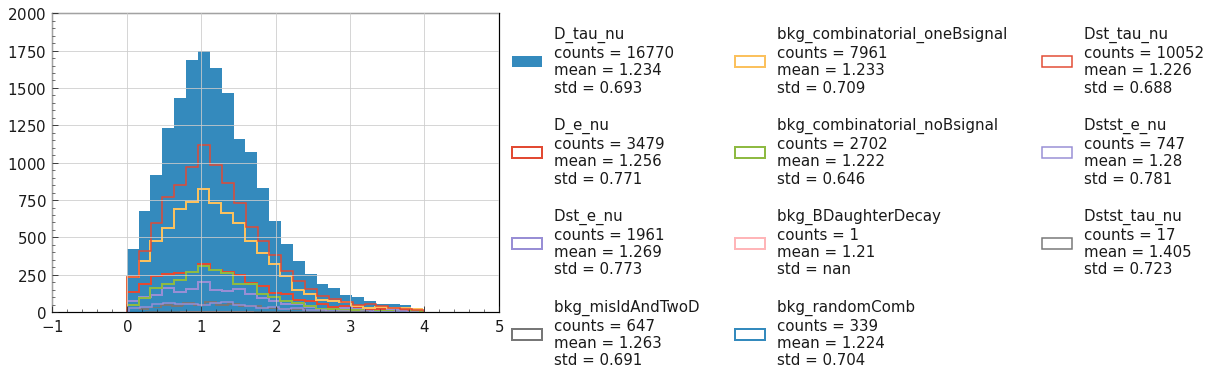

In [84]:
plot_projection('B0_roeMbc_my_mask>5.26 and B0_TagVReChi2<4','B0_TagVReChi2')

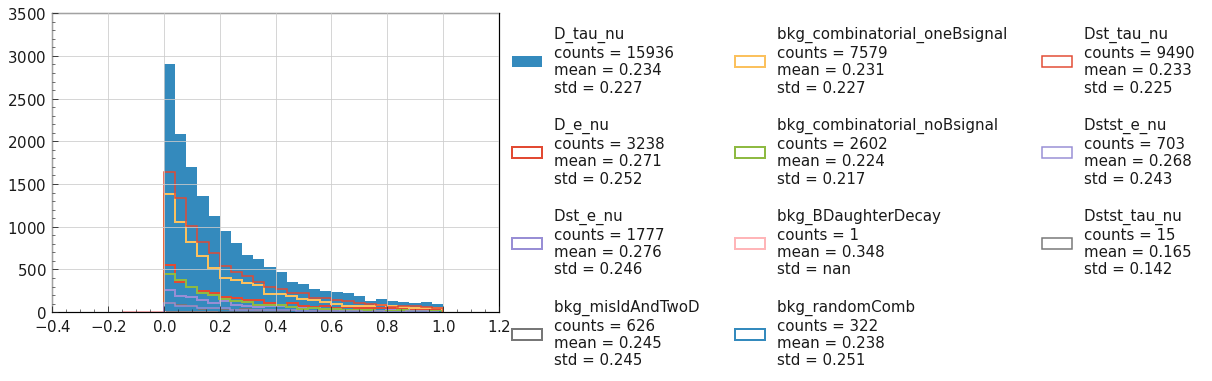

In [83]:
plot_projection('B0_roeMbc_my_mask>5.26 and B0_TagVReChi2IP<1','B0_TagVReChi2IP')

## 3. Flavor Tagger

In [ ]:
ft_info= df[['B0bar_FBDT_qrCombined','B0bar_FANN_qrCombined', 'B0bar_qrMC', 'B0bar_mcFlavorOfOtherB']]
ft_info.describe()

In [ ]:
df.B0bar_qrMC.value_counts()

In [ ]:
df.B0bar_mcFlavorOfOtherB.value_counts()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

## 4. $D^+$

In [ ]:
D_info=df[['D_CMS_pt','D_CMS_p', 'D_CMS_E', 'D_isSignal', 'D_mcErrors', 'D_mcPDG',
           'D_dM', 'D_BFM', 'D_BFInvM', 'D_vtxReChi2', 'D_vtxNDF']]
D_info.describe()

In [ ]:
df.groupby(['B0_isSignal','D_isSignal']).D_isSignal.count().unstack(level=-1,fill_value=0)

In [ ]:
plot_components('D_BFM')

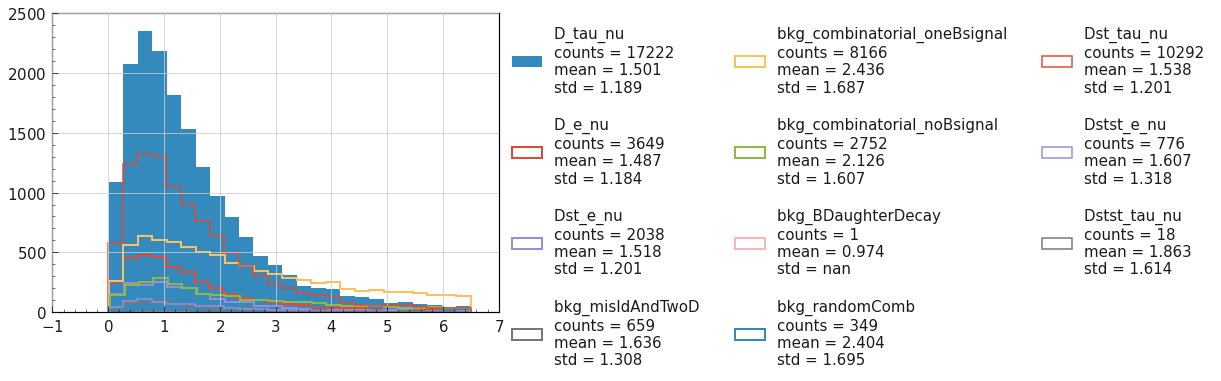

In [85]:
plot_projection('B0_roeMbc_my_mask>5.26','D_vtxReChi2')

## 5. $e^-$

In [ ]:
e_info=df[['e_CMS_pt', 'e_CMS_p','e_CMS_E', 'e_M', 'e_ErrM', 'e_SigM', 'e_InvM', 'e_isSignal',
           'e_mcErrors', 'e_mcPDG', 'e_dM', 'e_isBremsCorrected']]
e_info.describe()

In [ ]:
df.groupby(['B0_isSignal','e_isSignal']).e_isSignal.count().unstack(level=-1,fill_value=0)

In [ ]:
plot_components('e_CMS_p')

In [ ]:
B0_cuts = 'B0_Mbc>4.9 and B0_deltaE>-3 and B0_vtxReChi2<5'
D_cuts = 'and D_vtxReChi2<6.5'
l_cuts = 'and e_CMS_p>0.2'
roe_cuts = 'and B0_roeMbc_my_mask>4.9 and abs(B0_roeDeltae_my_mask)<1.5'
#and B0_roeCharge_my_mask==0'
all_cuts = B0_cuts + D_cuts + l_cuts + roe_cuts

## 7. Missing Mass^2

In [ ]:
def naive_mm2(data):
    # Energy and nominal mass
    E_B = df_event.Ecms.mean() / 2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc = data.B0_Mbc
    # 3 momentum
    p_Dl_x = data.D_CMS_px + data.e_CMS_px
    p_Dl_y = data.D_CMS_py + data.e_CMS_py
    p_Dl_z = data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_Dl2 = p_Dl_x**2 + p_Dl_y**2 + p_Dl_z**2
    p_Dl = np.sqrt(p_Dl2)
    p_B = np.sqrt(E_B**2 - M_B**2)
    m_Dl2 = E_Dl**2 - p_Dl2
    # Calculating the final quantities
    naive_missing_m2 = Mbc**2 + m_Dl2 - 2*E_B*E_Dl
    cos_theta_BY = -naive_missing_m2 / (2*p_B*p_Dl)
    return {'mm2': naive_missing_m2, 'cos': cos_theta_BY}

In [ ]:
# MM2 with ROE = (E_Y4S/2 - E_D - E_l)^2 - (p_cm - p_roe - p_D - p_l)^2
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_1(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    E_miss = E_B - E_Dl
#    M_B = pdg.get('anti-B0').Mass()
    # 3 momentum
    p_x = data.B0_CMS_roePx_my_mask + data.D_CMS_px + data.e_CMS_px
    p_y = data.B0_CMS_roePy_my_mask + data.D_CMS_py + data.e_CMS_py
    p_z = data.B0_CMS_roePz_my_mask + data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_miss2 = p_x**2 + p_y**2 + p_z**2
    # Calculating the final quantities
    withROE_missing_m2 = E_miss**2 - p_miss2
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [ ]:
# MM2 with ROE = Mbc_roe^2 + M_Y^2 - 2*E_Beam*E_Y - 2*(p_roe dot p_Y)
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_2(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Y = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc_roe = data.B0_roeMbc_my_mask
    # Calculating M_Y^2
    p_Yx = data.D_CMS_px + data.e_CMS_px
    p_Yy = data.D_CMS_py + data.e_CMS_py
    p_Yz = data.D_CMS_pz + data.e_CMS_pz
    p_Y2 = p_Yx**2 + p_Yy**2 + p_Yz**2
    m_Y2 = E_Y**2 - p_Y2
    # dot product
    p_xdot = data.B0_CMS_roePx_my_mask * p_Yx
    p_ydot = data.B0_CMS_roePy_my_mask * p_Yy
    p_zdot = data.B0_CMS_roePz_my_mask * p_Yz
    p_dot = p_xdot + p_ydot + p_zdot
    # Calculating the final quantities
    withROE_missing_m2 = M_B**2 + m_Y2 - 2*E_B*E_Y - 2*p_dot
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [ ]:
variable='mm2'
sig_mm2_1=withROE_mm2_1(df_bestSelected.query(sig))[variable]
bkg_mm2_1=withROE_mm2_1(df_bestSelected.query(bkg))[variable]
sig_mm2_2=withROE_mm2_2(df_bestSelected.query(sig))[variable]
bkg_mm2_2=withROE_mm2_2(df_bestSelected.query(bkg))[variable]
plt.scatter(sig_mm2_1,sig_mm2_2,marker='.',color='blue',label='signal')
plt.scatter(bkg_mm2_1,bkg_mm2_2,marker='.',color='green',label='bkg')
a=sig_mm2_1.min()
b=sig_mm2_1.max()
plt.plot([a,b],[a,b],color='red',label='y=x')
plt.legend()

In [ ]:
h_l=plt.hist2d(df_bkg_comb.e_CMS_p, df_bkg_comb.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()
#plt.savefig('2dplot.pdf')

In [ ]:
h_l=plt.hist2d(D_tau_nu.e_CMS_p, D_tau_nu.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()

In [ ]:
plot(df_dict=df_best_dict,calculation=withROE_mm2_2,variable='mm2')